In [17]:
#Practica 1
#Pedraza Santiago Uriel

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from scipy.stats import ttest_ind, sem

In [2]:
dataset = pd.read_csv('datos.csv')
dataset

,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,NaN
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,NaN
4,Juan González,Díaz,125,70.0
5,Juan García,Fernández,47,40.0
6,Luis Romero,López,149,100.0
7,Miguel Fernández,Romero,162,80.0
8,Carmen Pérez,Álvarez,139,45.0
9,Juan Rodríguez,Romero,18,30.0


## Ejercicio
Dentro del archivo "datos.csv" se encuentran las calificaciones obtenidas por un
grupo tras un examen final. Además, se recopiló información sobre el tiempo
dedicado a la materia a lo largo del semestre. A partir de estos datos encuentra
lo siguiente
- El mínimo, máximo, media y desviación estándar tanto para el número de
horas dedicadas como para las calificaciones obtenidas.

In [5]:
#Mínimo, máximo, media y desviación estándar del número de horas dedicadas
print('mínimo:', dataset['horas_dedicadas'].min())
print('máximo:', dataset['horas_dedicadas'].max())
print('media:', dataset['horas_dedicadas'].mean())
print('desviación estándar', dataset['horas_dedicadas'].std())

mínimo: 2
máximo: 178
media: 99.4
desviación estándar 58.129075974801204
58.129075974801204


In [6]:
#Mínimo, máximo, media y desviación estándar de las calificaciones obtenidas
print('mínimo:', dataset['calificaciones_obtenida'].min())
print('máximo:', dataset['calificaciones_obtenida'].max())
print('media:', dataset['calificaciones_obtenida'].mean())
print('desviación estándar:', dataset['calificaciones_obtenida'].std())

mínimo: 0.0
máximo: 100.0
media: 64.05555555555556
desviación estándar: 33.539217119177366


- Lleva a cabo un análisis de regresión lineal utilizando estos datos y presenta un gráfico que muestre el modelo de regresiónn junto con los datos originales.

In [3]:
#Reemplazar valores nulos
dataset = dataset.fillna(0)
horas_dedicadas = np.array(dataset['horas_dedicadas'])
calificaciones = np.array(dataset['calificaciones_obtenida'])
horas_dedicadas = horas_dedicadas.reshape(-1,1)

In [4]:
#Se crea y se entrena el modelo de regresión lineal
model = LinearRegression()
model.fit(horas_dedicadas, calificaciones)

LinearRegression()

Text(0, 0.5, 'Calificación obtenida')

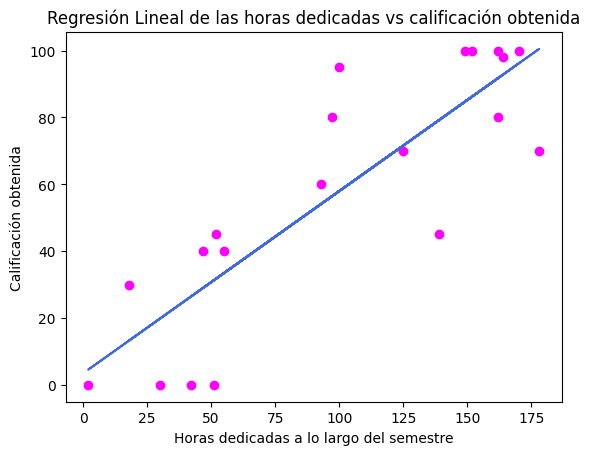

In [5]:
#Se gráfica el modelo de regresión
plt.scatter(horas_dedicadas, calificaciones, color='magenta')
plt.plot(horas_dedicadas, model.predict(horas_dedicadas), color='royalblue')
plt.title('Regresión Lineal de las horas dedicadas vs calificación obtenida')
plt.xlabel('Horas dedicadas a lo largo del semestre')
plt.ylabel('Calificación obtenida')

- Utiliza el modelo de regresión para realizar una predicción de la calificación de un estudiante que hubiera dedicado $n$ horas en el semestre a la materia
(donde $n$ es la suma de los digítos de su número de cuenta módulo 50)


In [30]:
#3+1+6+2+5+6+2+7= 32 
# 32% 50 =32 
estimacion = model.predict(np.array([[32]]))
print(estimacion[0])

20.91766769261441


- Investiga métodos para evaluar la bondad de ajuste de tu modelo y determinar cuán efectivamente explica el comportamiento de los datos. 

In [8]:
# medida R^2 
# Es la proporción de la varianza de las calificaciones que puede ser explicada por la estimación obtenida mediante el método de regresión lineal simple 
print(sklearn.metrics.r2_score(calificaciones, model.predict(horas_dedicadas)))
print('El modelo explica el 71.9 porciento de la varianza de las calificaciones')

#Usar prueba t de student para conocer si los coeficientes del modelos son significativos
print(ttest_ind(calificaciones, model.predict(horas_dedicadas)))
print("Como p-value>0.05 no se rechaza la hipótesis nula \n entonces b0 =0")

#El error estándar de la regresión permite saber la distancia promedio entre las calificaciones y los valores estimados
sem(model.predict(horas_dedicadas))
print("El valor del error estándar si bien no es despreciable, considerando que las horas dedicadas al \n estudio presentan una gran varianza nos indica que es razonable aceptar el modelo de regresión lineal")

0.7193358137770824